# Stochastic Gradient Descent

This exercise we will train a neural network on the *Fuel Economy* dataset and then explore
the effect of the learning rate and batch size of SGD.

**imports**

In [1]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

Set Matplotlib defaults.

In [2]:
pyplot.style.use("seaborn-v0_8-whitegrid")
pyplot.rc("figure", autolayout=True)
pyplot.rc("axes", labelweight="bold", labelsize="large",
          titleweight="bold", titlesize=18, titlepad=10)
pyplot.rc("animation", html="html5")

Retrieve dataset.

In [3]:
fuel_dataset = read_csv("datasets/fuel.csv")

Prep dataset

In [4]:
x = fuel_dataset.copy()
y = x.pop("FE")

preprocessor = make_column_transformer(
    (
        StandardScaler(),
        make_column_selector(dtype_include=numpy.number),  
    ),
    (
        OneHotEncoder(sparse_output=False),
        make_column_selector(dtype_include=object),
    )
)

x = preprocessor.fit_transform(x)
y = numpy.log(y)    # log transform target instead of standardizing

input_shape = [x.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


Fuel dataset display head

In [5]:
fuel_dataset.head()

EngDispl  NumCyl Transmission       FE AirAspirationMethod  NumGears  \
0       4.7       8          AM6  28.0198  NaturallyAspirated         6   
1       4.7       8           M6  25.6094  NaturallyAspirated         6   
2       4.2       8           M6  26.8000  NaturallyAspirated         6   
3       4.2       8          AM6  25.0451  NaturallyAspirated         6   
4       5.2      10          AM6  24.8000  NaturallyAspirated         6   

   TransLockup  TransCreeperGear          DriveDesc  IntakeValvePerCyl  \
0            1                 0  TwoWheelDriveRear                  2   
1            1                 0  TwoWheelDriveRear                  2   
2            1                 0      AllWheelDrive                  2   
3            1                 0      AllWheelDrive                  2   
4            0                 0      AllWheelDrive                  2   

   ExhaustValvesPerCyl CarlineClassDesc  VarValveTiming  VarValveLift  
0                    2         2Seaters               1             0  
1                    2         2Seaters               1             0  
2                    2         2Seaters               1             0  
3                    2         2Seaters               1             0  
4                    2         2Seaters               1             0

Display dataframe head

In [6]:
DataFrame(x[:10,:]).head()

0         1         2         3         4         5        6   \
0  0.913643  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
1  0.913643  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
2  0.530594  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
3  0.530594  1.068005  0.524148  0.685653 -0.226455  0.391659  0.43492   
4  1.296693  2.120794  0.524148 -1.458464 -0.226455  0.391659  0.43492   

         7         8    9   ...   40   41   42   43   44   45   46   47   48  \
0  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.463841 -0.447941  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    49  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 50 columns]

Design model.

In [7]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1)
])

2024-06-06 23:04:10.465099: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-06-06 23:04:10.465119: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-06-06 23:04:10.465124: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-06-06 23:04:10.465140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-06 23:04:10.465149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Compile Optimizer and loss functions

In [8]:
model.compile(
    optimizer="adam",
    loss="mae"
)

Train data and set results to history variable

In [9]:
history = model.fit(
    x,y,
    batch_size=128,
    epochs=200
)

Epoch 1/200


2024-06-06 23:04:10.795796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2566
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1735 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6956 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4326 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2325 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1936 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1476 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1190 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1018 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0870 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0713 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0713 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 
Epoch 16/200
9/9 ━━━━━━━━━━━━━━

Display loss data visual.

<Axes: >

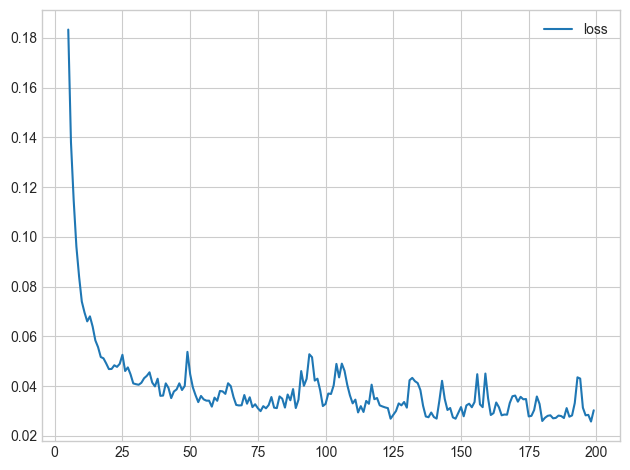

In [10]:
history_dataframe = DataFrame(history.history)
history_dataframe.loc[5:, ["loss"]].plot()